In [2]:
import matplotlib
# import seaborn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as ss
from matplotlib import style
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)
import pandas as pd
import seaborn as sns
import xlrd
import re

# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_model import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler


In [25]:
f22 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171010.xls'
# df = pd.read_excel(f22, sheetname='TRAB_100', index_col='sample_id')
df = pd.read_excel(f22, sheetname='meta_106', index_col='patient')
df.head(2)
# cdf = pd.read_excel(f22, sheetname='meta_106', index_col='patient')

,DNA_lib,source,RNA_lib,strelka_snv_indel_total,log10_strelka_total,DNA_microbe_RPM,DNA_microbe_logRPM,combo,RNA_microbe_RPM,RNA_microbe_logRPM,...,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,total_immune_cells
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,A37234,HTMCP_124,A37700,26974,4.430945,3.322137,0.521418,Squamous_+,4056.790826,3.608183,...,0.3,1.9,0.1,519.9,1.9,4.5,4.2,2.6,26.2,535.3
HTMCP-03-06-02002,A37235,HTMCP_125,A37701,16661,4.221701,0.058688,-1.231448,Squamous_-,135.435651,2.131733,...,1.9,2.7,0.5,336.6,6.8,2.4,8.1,1.4,7.5,363.7


In [7]:
# %time df_cells = pd.read_csv('/projects/trans_scratch/validations/mcp-counter/mcp_estimates.csv', sep='\t', index_col='cells')
# df_cells.head(2)

In [9]:
df.describe()

,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,5.680198,1.844554,2.088119,0.154455,1497.507921,6.109901,1.746535,5.045545,3.760396,89.050495
std,10.326558,5.330000,1.932837,0.145962,2731.907420,3.578505,1.599160,3.410235,2.364237,82.969704
min,0.400000,0.000000,0.100000,0.000000,0.400000,0.700000,0.100000,1.500000,1.000000,2.800000
25%,1.900000,0.500000,0.800000,0.100000,174.200000,3.200000,0.700000,2.900000,2.500000,38.200000
50%,3.100000,0.900000,1.600000,0.100000,610.700000,5.400000,1.200000,4.000000,3.200000,65.900000
75%,5.000000,1.800000,2.800000,0.200000,1692.000000,8.500000,2.300000,6.400000,4.100000,109.800000
max,86.500000,53.000000,13.000000,1.000000,17853.300000,16.400000,8.300000,23.800000,13.100000,466.200000


In [10]:
df.rename(columns={'cells':'patient'}, inplace=True)

In [11]:
df.head(2)

,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts
cells,,,,,,,,,,
HTMCP-03-06-02001,2.5,0.3,1.9,0.1,519.9,1.9,4.5,4.2,2.6,26.2
HTMCP-03-06-02002,4.7,1.9,2.7,0.5,336.6,6.8,2.4,8.1,1.4,7.5


In [12]:
# rename index/column names at index level
df.index.names = ['patient']
df.columns.names = ['funny']
df.head(2)

funny,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts
patient,,,,,,,,,,
HTMCP-03-06-02001,2.5,0.3,1.9,0.1,519.9,1.9,4.5,4.2,2.6,26.2
HTMCP-03-06-02002,4.7,1.9,2.7,0.5,336.6,6.8,2.4,8.1,1.4,7.5


In [13]:
df['total'] = df.sum(axis=1)

In [14]:
df.head()

funny,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,total
patient,,,,,,,,,,,
HTMCP-03-06-02001,2.5,0.3,1.9,0.1,519.9,1.9,4.5,4.2,2.6,26.2,564.1
HTMCP-03-06-02002,4.7,1.9,2.7,0.5,336.6,6.8,2.4,8.1,1.4,7.5,372.6
HTMCP-03-06-02003,2.9,1.7,3.2,0.2,59.2,16.4,0.9,9.7,3.2,47.4,144.8
HTMCP-03-06-02006,1.8,0.6,1.8,0.1,315.9,4.6,0.7,2.3,2.7,189.1,519.6
HTMCP-03-06-02007,4.6,2.7,4.1,0.2,1492.5,8.1,1.7,2.4,3.1,151.1,1670.5


In [384]:
# add in patient id into the dataframe
# df_clinic = pd.read_excel('/projects/trans_scratch/validations/workspace/szong/Cervical/E6_E7_expression/Cervical_integration_expression_mastertable_reviewed.xls')
# df_clinic = df_clinic[['patient','putative_Histology', 'HIV_status', 'library_RNA']].set_index('patient')
# df_clinic.head(2)

,putative_Histology,HIV_status,library_RNA
patient,,,
HTMCP-03-06-02202,Squamous,Positive,A57112
HTMCP-03-06-02240,Squamous,Positive,A57123


In [17]:
cdf.columns

Index(['DNA_lib', 'source', 'RNA_lib', 'CCR5_rpkm', 'CXCR4_rpkm', 'cd4_rpkm',
       'CD8AB_rpkm', 'ribodepleted_lib', 'reanne_HIV_status', 'HPV_status',
       'histologic_diagnosis', 'reanne_Putative_histology', 'birth_days_to',
       'menopause_status', 'height_cm_at_diagnosis', 'weight_kg_at_diagnosis',
       'history_hormonal_contraceptives_use', 'live_birth_pregnancy_count',
       'total_pregnancy_count', 'pregnancies_count_miscarriage',
       'pregnancies_count_induced_abortion', 'karnofsky_score',
       'tobacco_smoking_history_indicator', 'ecog_score', 'nadir_cd4_counts',
       'cd4_counts_at_diagnosis', 'hiv_rna_load_at_diagnosis',
       'haart_therapy_prior_to_dx', 'haart_therapy_at_dx', 'age_at_diagnosis',
       'keratinization_squamous_cell', 'tumor_grade', 'ajcc_tumor_clinical_ct',
       'clinical_stage', 'days_to_hiv_diagnosis', 'patient_id'],
      dtype='object')

In [18]:
cdf = cdf[['reanne_HIV_status',
           'cd4_rpkm',
           'CCR5_rpkm', 
           'CXCR4_rpkm',
           'CD8AB_rpkm',
           'reanne_Putative_histology',
           'cd4_counts_at_diagnosis',
           'hiv_rna_load_at_diagnosis',
           'haart_therapy_at_dx', 
           'tumor_grade', 
           'days_to_hiv_diagnosis',
           'clinical_stage'  ]]
cdf.head()

,reanne_HIV_status,cd4_rpkm,CCR5_rpkm,CXCR4_rpkm,CD8AB_rpkm,reanne_Putative_histology,cd4_counts_at_diagnosis,hiv_rna_load_at_diagnosis,haart_therapy_at_dx,tumor_grade,days_to_hiv_diagnosis,clinical_stage
patient,,,,,,,,,,,,
HTMCP-03-06-02001,Positive,4.9655,1.1667,4.7755,1.3883,Squamous,337.0,34.0,YES,G2,NaN,Stage IIB
HTMCP-03-06-02002,Negative,13.2054,3.9616,8.7610,11.0276,Squamous,NaN,NaN,NaN,G3,NaN,Stage IB1
HTMCP-03-06-02003,Positive,16.4414,3.4660,10.6535,8.7617,Squamous,482.0,34.0,YES,G2,NaN,Stage IB2
HTMCP-03-06-02006,Negative,10.1120,3.0612,6.4499,4.5775,Squamous,NaN,NaN,NaN,G3,NaN,Stage IIB
HTMCP-03-06-02007,Negative,28.0539,6.6787,24.3593,15.9632,Adeno,NaN,NaN,NaN,G3,NaN,Stage IIIB


In [22]:
dfm =  pd.merge(df, cdf, left_index=True, right_index=True)

In [23]:
dfm.shape

(100, 22)

In [385]:
df_mg = pd.merge(df_tmp, df_clinic, left_index=True, right_index=True)

In [397]:
# combination of histology and hiv status
df_mg['combo'] = df_mg[['putative_Histology', 'HIV_status']].apply(lambda x: re.sub('Negative','-','_'.join(x)), axis=1)
df_mg['combo'] = df_mg['combo'].apply(lambda x: re.sub('Positive','+',x))
df_mg.head(2)

,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,total,putative_Histology,HIV_status,library_RNA,combo
patient,,,,,,,,,,,,,,,
HTMCP-03-06-02202,4.1,1.0,6.1,0.4,637.3,8.4,0.9,12.3,4.9,252.9,928.3,Squamous,Positive,A57112,Squamous_+
HTMCP-03-06-02240,7.4,0.6,0.9,0.1,2660.1,1.2,0.7,2.2,2.5,99.0,2774.7,Squamous,Positive,A57123,Squamous_+


In [398]:
df_mg.sort_index().to_csv('/projects/trans_scratch/validations/mcp-counter/mcpcounter_results.txt',sep='\t')

In [399]:
# log transformation of a B lineage, wild range:0.4 - 17853
df_mg['B lineage(log)'] = np.round(np.log10(df_mg['B lineage']), decimals=4) 
df_mg['T cells(log)'] = np.round(np.log10(df_mg['T cells']), decimals=4)
df_mg['CD8 T cells(log)'] = np.round(np.log10(df_mg['CD8 T cells'] + 0.001), decimals=4)
df_mg['total(log)'] = np.round(np.log10(df_mg['total'] + 0.001), decimals=4)
df_mg.drop(['B lineage', 'T cells', 'CD8 T cells', 'total'], inplace=True, axis=1)
df_mg.head(2)

,Cytotoxic lymphocytes,NK cells,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,putative_Histology,HIV_status,library_RNA,combo,B lineage(log),T cells(log),CD8 T cells(log),total(log)
patient,,,,,,,,,,,,,,,
HTMCP-03-06-02202,6.1,0.4,8.4,0.9,12.3,4.9,252.9,Squamous,Positive,A57112,Squamous_+,2.8043,0.6128,0.0004,2.9677
HTMCP-03-06-02240,0.9,0.1,1.2,0.7,2.2,2.5,99.0,Squamous,Positive,A57123,Squamous_+,3.4249,0.8692,-0.2211,3.4432


In [400]:
df_dr = df_mg.drop(['putative_Histology', 'HIV_status', 'library_RNA', 'combo', 'Fibroblasts', 'Endothelial cells'], axis=1)
cells = df_dr.columns.tolist()
cells

['Cytotoxic lymphocytes',
 'NK cells',
 'Monocytic lineage',
 'Myeloid dendritic cells',
 'Neutrophils',
 'B lineage(log)',
 'T cells(log)',
 'CD8 T cells(log)',
 'total(log)']

In [401]:
df_mg.groupby('HIV_status').max()

,Cytotoxic lymphocytes,NK cells,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,putative_Histology,library_RNA,combo,B lineage(log),T cells(log),CD8 T cells(log),total(log)
HIV_status,,,,,,,,,,,,,,
Negative,7.7,1.0,14.1,7.4,23.8,13.1,466.2,Squamous,A68268,Squamous_-,4.2517,1.4843,0.7325,4.2551
Positive,13.0,0.4,16.4,8.3,12.3,13.1,399.9,Squamous,A68266,Squamous_+,4.1828,1.9370,1.7243,4.1887


In [402]:
df_mg.groupby('HIV_status').median()

,Cytotoxic lymphocytes,NK cells,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,B lineage(log),T cells(log),CD8 T cells(log),total(log)
HIV_status,,,,,,,,,,,
Negative,1.7,0.1,5.15,1.6,3.7,2.8,64.5,2.92315,0.6128,0.0004,2.9568
Positive,1.4,0.1,5.90,0.9,4.5,3.3,67.0,2.65930,0.4150,-0.0964,2.7124


/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


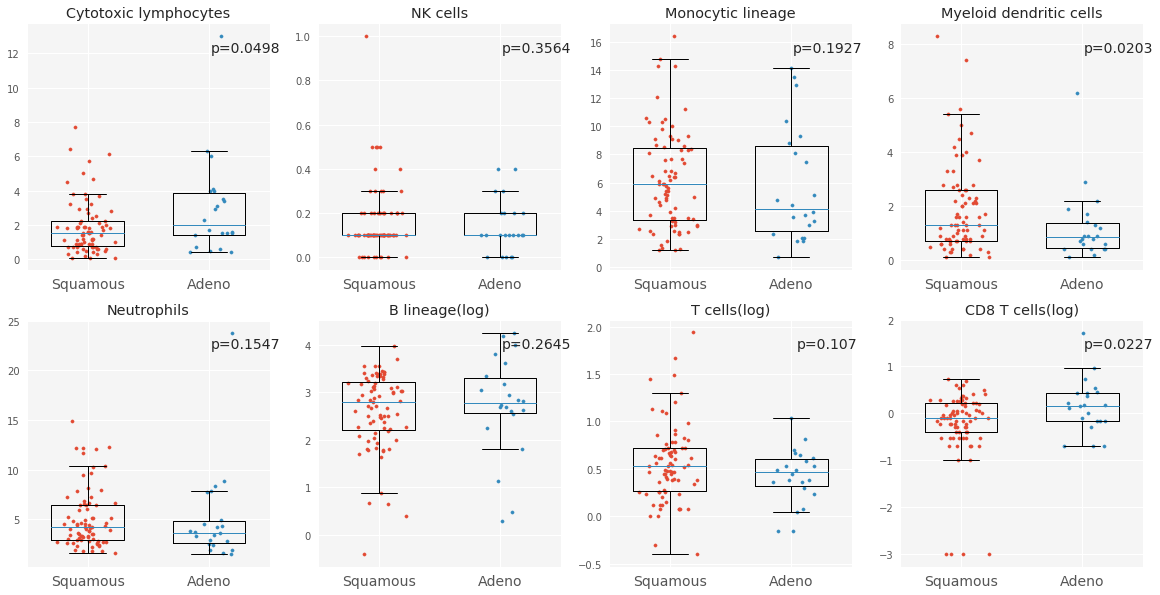

In [320]:
# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(cells)/4.0), 4, figsize=(20, 10))
axes = axes.ravel()
# group_col = 'HIV_status'
group_col = 'putative_Histology'
# categories = ['Positive', 'Negative']
categories = sorted(df_mg[group_col].unique().tolist(), reverse=True) 

for k, cell in enumerate(cells):
    ax = axes[k]
    value_col = cell
    for position, cat in enumerate(categories):
#         ax.boxplot(df_mg.query('HIV_status == "{}"'.format(cat))[cell], 
        ax.boxplot(df_mg.query('{0} == "{1}"'.format(group_col, cat))[cell], 
                   positions=[position], widths=(0.6)
                  )

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df_mg[value_col][df_mg[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
        ax.scatter(x, y, s=10)
        grps[i] = df_mg.query('{0} == "{1}"'.format(group_col, cat))[cell]

    # statistical test 
    stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p = round(p, 4)
    ax.text(0.9, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)               
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    ax.set_xticks(range(position+1))
    ax.set_xticklabels(categories)
    ax.set_title(cell)
    ax.set_xlim(xmin=-0.5)
    ax.grid(True)

plt.suptitle(' ', fontsize=14)       
plt.savefig('/projects/trans_scratch/validations/mcp-counter/cell_histology_plots.png', dpi=200)


/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


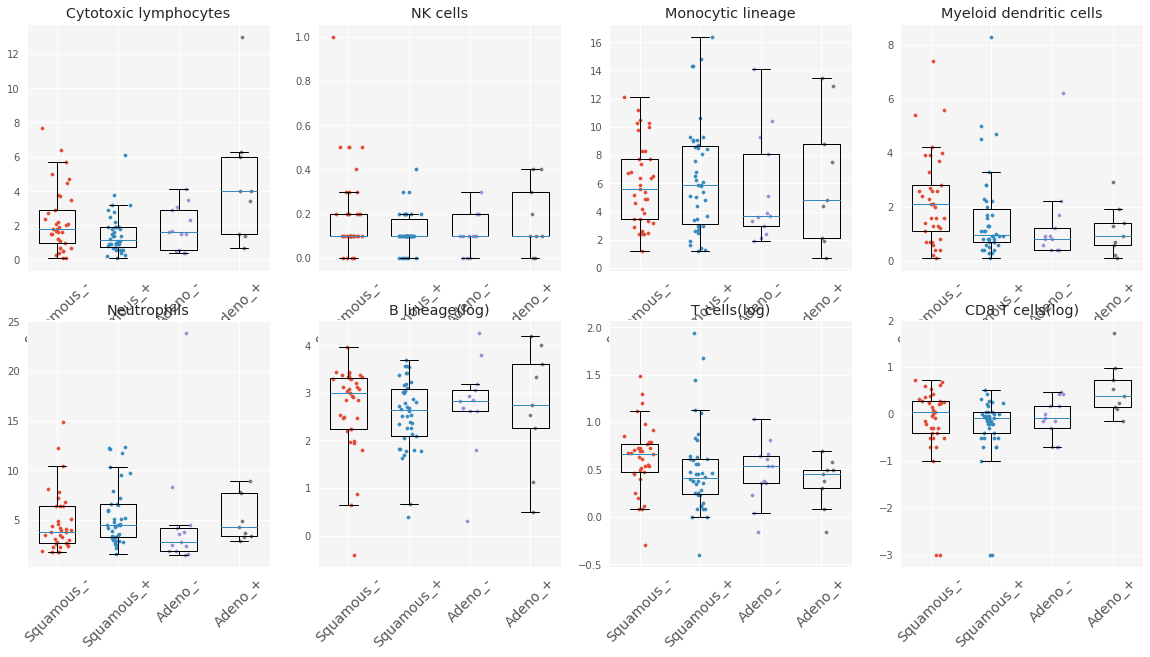

In [322]:
# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(cells)/4.0), 4, figsize=(20, 10))
axes = axes.ravel()
# group_col = 'HIV_status'
group_col = 'combo'
# categories = ['Positive', 'Negative']
categories = sorted(df_mg[group_col].unique().tolist(), reverse=True) 

for k, cell in enumerate(cells):
    ax = axes[k]
    value_col = cell
    for position, cat in enumerate(categories):
#         ax.boxplot(df_mg.query('HIV_status == "{}"'.format(cat))[cell], 
        ax.boxplot(df_mg.query('{0} == "{1}"'.format(group_col, cat))[cell], 
                   positions=[position], widths=(0.6)
                  )

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df_mg[value_col][df_mg[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
        ax.scatter(x, y, s=10)
        grps[i] = df_mg.query('{0} == "{1}"'.format(group_col, cat))[cell]

    # statistical test 
#     stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
#     p = round(p, 4)
#     ax.text(0.9, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)               
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    ax.set_xticks(range(position+1))
    ax.set_xticklabels(categories, rotation=45)
    ax.set_title(cell)
    ax.set_xlim(xmin=-0.5)
    ax.grid(True)

plt.suptitle(' ', fontsize=14)       
plt.savefig('/projects/trans_scratch/validations/mcp-counter/cell_combo_plots.png', dpi=200)

In [ ]:
# look at optitype results

In [349]:
df_opti = pd.read_csv('/projects/trans_scratch/validations/optitype/rna/hla_summary_partial.txt', sep='\t', index_col='patient')
df_opti.head()

,something,A1,A2,B1,B2,C1,C2,Reads,Objective
patient,,,,,,,,,
HTMCP-03-06-02001,0,A*30:04,A*30:02,B*45:01,B*14:01,C*08:02,C*16:01,306391.0,298118.443
HTMCP-03-06-02002,0,A*68:01,A*23:01,B*57:03,B*45:01,C*06:02,C*06:02,436586.0,428727.452
HTMCP-03-06-02089,0,A*26:01,A*26:01,B*81:01,B*53:01,C*04:01,C*04:01,258751.0,256422.241
HTMCP-03-06-02092,0,A*23:01,A*01:01,B*18:03,B*51:01,C*16:01,C*04:01,86814.0,84470.022
HTMCP-03-06-02103,0,A*30:02,A*02:01,B*08:01,B*15:10,C*07:01,C*02:10,212345.0,206611.685


In [344]:
df_opti['A1_family'] = df_opti.A1.apply(lambda x: x.split(':')[0])

In [346]:
df_opti['A1_family'].value_counts()

A*02    16
A*30    12
A*74    11
A*68    10
A*23     6
A*26     3
A*01     3
A*03     3
A*36     2
A*66     2
A*29     2
A*33     1
A*32     1
Name: A1_family, dtype: int64

In [348]:
df_opti.head()

,patient,something,A1,A2,B1,B2,C1,C2,Reads,Objective,A1_family
0,HTMCP-03-06-02001,0,A*30:04,A*30:02,B*45:01,B*14:01,C*08:02,C*16:01,306391.0,298118.443,A*30
1,HTMCP-03-06-02002,0,A*68:01,A*23:01,B*57:03,B*45:01,C*06:02,C*06:02,436586.0,428727.452,A*68
2,HTMCP-03-06-02089,0,A*26:01,A*26:01,B*81:01,B*53:01,C*04:01,C*04:01,258751.0,256422.241,A*26
3,HTMCP-03-06-02092,0,A*23:01,A*01:01,B*18:03,B*51:01,C*16:01,C*04:01,86814.0,84470.022,A*23
4,HTMCP-03-06-02103,0,A*30:02,A*02:01,B*08:01,B*15:10,C*07:01,C*02:10,212345.0,206611.685,A*30


In [347]:
df_clinic

,putative_Histology,HIV_status,library_RNA
patient,,,
HTMCP-03-06-02202,Squamous,Positive,A57112
HTMCP-03-06-02240,Squamous,Positive,A57123
HTMCP-03-06-02174,Squamous,Negative,A52349
HTMCP-03-06-02128,Squamous,Positive,A50343
HTMCP-03-06-02151,Squamous,Positive,A54469
HTMCP-03-06-02108,Squamous,Positive,A50337
HTMCP-03-06-02209,Squamous,Negative,A52364
HTMCP-03-06-02013,Squamous,Negative,A37708
HTMCP-03-06-02042,Squamous,Negative,A37717


In [350]:
df_opti_mg = pd.merge(df_opti, df_clinic, left_index=True, right_index=True)
df_opti_mg.head()

,something,A1,A2,B1,B2,C1,C2,Reads,Objective,putative_Histology,HIV_status,library_RNA
patient,,,,,,,,,,,,
HTMCP-03-06-02202,0,A*68:02,A*23:01,B*14:01,B*44:03,C*02:10,C*04:01,65601.0,63829.773,Squamous,Positive,A57112
HTMCP-03-06-02240,0,A*29:02,A*02:01,B*15:03,B*58:01,C*02:10,C*03:02,86849.0,84504.077,Squamous,Positive,A57123
HTMCP-03-06-02174,0,A*29:02,A*30:01,B*42:01,B*42:01,C*17:01,C*17:01,34318.0,34009.138,Squamous,Negative,A52349
HTMCP-03-06-02128,0,A*30:01,A*02:01,B*42:01,B*49:01,C*17:01,C*07:01,16786.0,16332.778,Squamous,Positive,A50343
HTMCP-03-06-02151,0,A*23:01,A*29:02,B*42:01,B*44:03,C*07:01,C*17:01,40429.0,39337.417,Squamous,Positive,A54469


In [352]:
df_opti_mg.groupby('HIV_status').median()
# this does not support the idea that virus often inhibit MHC expression

,something,Reads,Objective
HIV_status,,,
Negative,0,90534.5,88090.0685
Positive,0,86387.0,84054.5510


0
1
2
3


/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


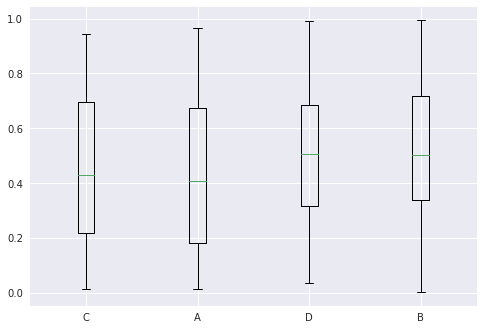

In [4]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(37,4), columns=list('ABCD'))
columns_my_order = ['C', 'A', 'D', 'B']
fig, ax = plt.subplots()
for position, column in enumerate(columns_my_order):
    print(position)
    ax.boxplot(df[column], positions=[position])

ax.set_xticks(range(position+1))
ax.set_xticklabels(columns_my_order)
ax.set_xlim(xmin=-0.5)
plt.show()

In [383]:
Positive.mean()
Negative.mean()

T cells                    0.7052
CD8 T cells                0.3292
Cytotoxic lymphocytes      0.4416
NK cells                   0.0666
B lineage                  2.7204
Monocytic lineage          0.7888
Myeloid dendritic cells    0.4212
Neutrophils                0.6964
Endothelial cells          0.6208
Fibroblasts                1.7818
dtype: float64

In [213]:
df_mg

,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,putative_Histology,HIV_status,library_RNA,combo
patient,,,,,,,,,,,,,,
HTMCP-03-06-02202,0.71,0.30,0.85,0.15,2.81,0.97,0.28,1.12,0.77,2.40,Squamous,Positive,A57112,Squamous_Positive
HTMCP-03-06-02240,0.92,0.20,0.28,0.04,3.43,0.34,0.23,0.51,0.54,2.00,Squamous,Positive,A57123,Squamous_Positive
HTMCP-03-06-02174,0.80,0.43,0.49,0.08,3.09,0.94,0.58,0.53,0.52,1.60,Squamous,Negative,A52349,Squamous_Negative
HTMCP-03-06-02128,0.53,0.26,0.30,0.04,2.27,0.60,0.11,0.41,0.57,1.81,Squamous,Positive,A50343,Squamous_Positive
HTMCP-03-06-02151,1.94,0.62,0.45,0.11,3.02,0.64,0.32,0.69,0.51,1.52,Squamous,Positive,A54469,Squamous_Positive
HTMCP-03-06-02108,0.30,0.08,0.28,0.04,1.82,1.18,0.26,1.12,0.67,1.93,Squamous,Positive,A50337,Squamous_Positive
HTMCP-03-06-02209,1.32,0.56,0.67,0.04,2.24,0.97,0.49,0.52,0.51,1.41,Squamous,Negative,A52364,Squamous_Negative
HTMCP-03-06-02013,0.64,0.15,0.18,0.04,1.94,0.81,0.56,0.87,0.49,1.48,Squamous,Negative,A37708,Squamous_Negative
HTMCP-03-06-02042,0.75,0.45,0.65,0.18,3.34,0.88,0.82,0.70,0.66,1.45,Squamous,Negative,A37717,Squamous_Negative


0 Squamous_Positive
1 Squamous_Negative
2 Adeno_Positive
3 Adeno_Negative


In [178]:
ss.mannwhitneyu(Negative[value_col], Positive[value_col], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=1189.0, pvalue=0.28070510637446511)

/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/colors.py:858: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/colors.py:859: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


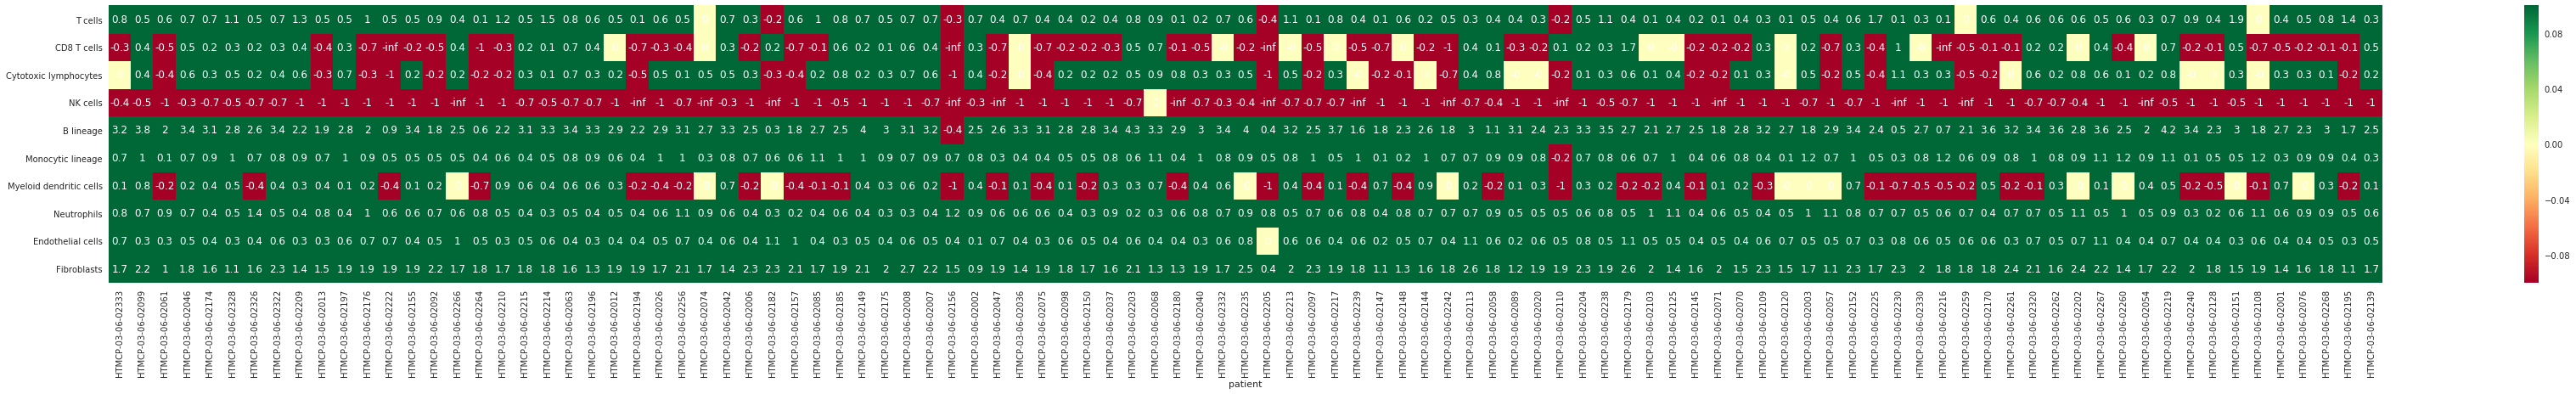

In [101]:
fig, ax = plt.subplots(figsize=(60,6))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
# plt.imshow(df_cells, cmap='hot', interpolation='nearest')
# plt.show()
sns.heatmap(df_mg.T, cmap='RdYlGn', annot=True, ax=ax)

In [17]:
sns.heatmap?

In [22]:
%time df_expr = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.dedup.txt')
df_expr.head(2)

CPU times: user 5.31 s, sys: 39 ms, total: 5.35 s
Wall time: 5.35 s


,lib,SCYL3,C1orf112,FGR,CFH,STPG1,NIPAL3,AK2,KDM1A,TTC22,...,EIF4A1P2,MXRA5P1,CTBP2P1,ATP5JP1,PARP4P1,KALP,AC006157.2,RP11-886I11.1,RP11-886I11.3,RP11-886I11.2
0,A37700,3.6416,4.8082,0.7059,14.3879,1.6436,8.7098,29.0268,43.5168,18.7297,...,0.0,0.0799,0.0369,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
1,A37701,5.9656,3.9581,2.1283,22.7599,1.2715,6.1969,18.3112,21.3308,30.3388,...,0.0,0.0000,0.0000,0.0,0.0081,0.0,0.0,0.0,0.0,0.0


In [23]:
# add in patient id into the dataframe
df_clinic = pd.read_excel('/projects/trans_scratch/validations/workspace/szong/Cervical/E6_E7_expression/Cervical_integration_expression_mastertable_reviewed.xls')
# df_clinic.set_index('patient', inplace=True)
# df_clinic.head(2)
# df_clinic.library_RNA
df_clinic = df_clinic[['patient','putative_Histology', 'HIV_status', 'library_RNA']]
df_clinic.head(2)

,patient,putative_Histology,HIV_status,library_RNA
0,HTMCP-03-06-02202,Squamous,Positive,A57112
1,HTMCP-03-06-02240,Squamous,Positive,A57123


In [24]:
df_jnt = pd.merge(df_expr, df_clinic, left_on='lib', right_on='library_RNA', how='inner')
df_jnt.drop(['lib', 'library_RNA'], axis=1, inplace=True)
df_jnt.set_index('patient', inplace=True)

In [25]:
df_jnt.head(2)

,SCYL3,C1orf112,FGR,CFH,STPG1,NIPAL3,AK2,KDM1A,TTC22,ST7L,...,CTBP2P1,ATP5JP1,PARP4P1,KALP,AC006157.2,RP11-886I11.1,RP11-886I11.3,RP11-886I11.2,putative_Histology,HIV_status
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,3.6416,4.8082,0.7059,14.3879,1.6436,8.7098,29.0268,43.5168,18.7297,1.3490,...,0.0369,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,Squamous,Positive
HTMCP-03-06-02002,5.9656,3.9581,2.1283,22.7599,1.2715,6.1969,18.3112,21.3308,30.3388,1.8652,...,0.0000,0.0,0.0081,0.0,0.0,0.0,0.0,0.0,Squamous,Negative


In [19]:
df_jnt.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.dedup.merged.status.txt')

In [26]:
# analysis all 824 immune related genes
df_immune = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/immuno_related_genes.txt')
immune_genes = df_immune['name'].tolist()
# genes = ['YAP1', 'CTLA4', 'PDCD1', 'CD274', 'PDCD1LG2']
genes = immune_genes


In [27]:
# pick only those significantly differentially expressed genes
plot_genes = {}
for k, gene in enumerate(genes):
    if gene in df_jnt.columns:
        group_col = 'HIV_status'
        value_col = gene
    # statistical test 
#         print('Mann Whitney U test on {0} comparing {1}'.format(value_col, group_col))
        Negative = df_jnt[df_jnt[group_col]=='Negative']
        Positive = df_jnt[df_jnt[group_col]=='Positive']
        # tie corrected Mann Whitney U test,
        mann_statistics = ss.mannwhitneyu(Negative[value_col], Positive[value_col], use_continuity=True, alternative=None)
        p = float(str(mann_statistics).split('pvalue=')[1].replace(')', ''))
        if p < 0.01:
#             print(p)
            plot_genes[gene] = p

In [28]:
plot_genes
# sort dictionary on values
srt_genes = [(k, plot_genes[k]) for k in sorted(plot_genes, key=plot_genes.get, reverse=False)]
# srt_genes

In [32]:
# srt_genes

In [392]:

# plot_genes['TNFSF4']

9.47578521930293e-05

In [56]:
# pick the first 30 genes
srt_genes = srt_genes[:30]
srt_genes

In [33]:
srt_genes = [i[0] for i in srt_genes]

In [41]:
len(srt_genes)

138

In [48]:
srt_genes =['CD4', 'CCR5', 'CTLA4', 'PDCD1', 'PDCD1LG2']


In [51]:
# print(plot_genes[ 'PDCD1LG2'])

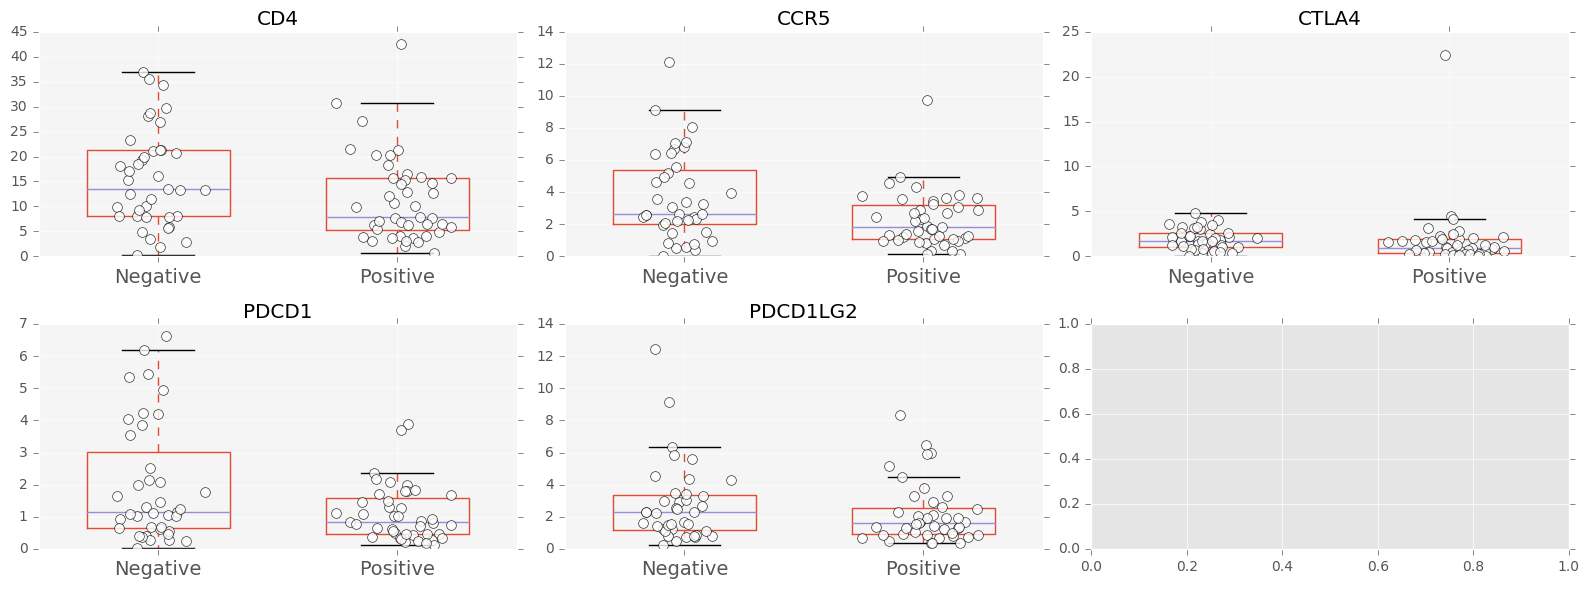

In [46]:
# boxplot hiv + vs -
fig, axes = plt.subplots(int(len(srt_genes)/3.0)+1, 3, figsize=(16, 6))
axes = axes.ravel()

for k, gene in enumerate(srt_genes):
        ax = axes[k]
        group_col = 'HIV_status'
        value_col = gene
        df_jnt.boxplot(ax=ax, column=value_col, by=group_col, showfliers=False, widths=(0.6,0.6), figsize=(5,5))
#         plt.title('') # this removes the column as subtitle of the plot
        fig = ax.get_figure()
        # fig.suptitle('')

        np.random.seed(0)
        # overlay actuall data points
        categories = df_jnt[group_col].unique().tolist()
        for category in categories:
            y = df_jnt[value_col][df_jnt[group_col]==category]
        #     i = categories.index(category) + 1
            if category == 'Negative':
                i = 1
            elif category == 'Positive':
                i = 2
            # add jitter and specify maker facecolor and edgecolor
            x = np.random.normal(i, 0.1, size=len(y))
            ax.plot(x, y, 'o', markerfacecolor='white',markeredgecolor='black', markersize=7, alpha=0.8)

        # ax.set_ylim(0,0.1)
        ax.set_axis_bgcolor('whitesmoke') #specify plot backgroup color
        ax.tick_params(axis='x', labelsize=14) #specify x tick label size
        # ax.set_ylim(0,200000)
        ax.set_xlabel(' ', fontsize=14)
        ax.set_ylabel(' ', fontsize=14)
    #     ax.suptitle(' ', fontsize=14)  # get rid of the automatically generated title
        plt.tight_layout()
        fig_name = '.'.join([gene, 'png'])
        plt.savefig(fig_name, dpi=200)

 
plt.suptitle(' ', fontsize=14)       
plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/test.png', dpi=200)


# use tsne to visualize the expression high dimensional data

In [53]:
df_jnt = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.dedup.merged.status.txt')
# df_jnt.shape
# df_jnt.head(2)
ALL_GENES = [_ for _ in df_jnt.columns.values.tolist() if _ not in ['putative_Histology', 'HIV_status', 'patient']]
# len(ALL_GENES)
# df_jnt.head(2)
# df_jnt.columns.value_counts().unique()
# len(ALL_GENES)

In [54]:
# loistic regression to find most distinguishing genes
candidate_genes = list(sorted(ALL_GENES))
df_X = df_jnt[candidate_genes].copy()
df_y = df_jnt['HIV_status'].apply(lambda v: 0 if v == 'Negative' else 1)
# df_X.shape
# df_y.shape
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(df_X, df_y)
# clf.coef_[0].shape

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
df_coef = pd.DataFrame(zip(candidate_genes, clf.coef_[0]), columns=['gene', 'coef'])
df_coef['abs_coef'] = df_coef.coef.abs()
df_coef.sort_values('abs_coef', ascending=False, inplace=True)
# df_coef
sel_genes = df_coef.head(10).gene.values
# len(sel_genes)


In [56]:
df_expr = df_jnt.copy()
# scale data
%time df_expr_scaled = StandardScaler().fit_transform(df_expr[sel_genes].values)
# df_expr[sel_genes]

CPU times: user 21 ms, sys: 0 ns, total: 21 ms
Wall time: 5.12 ms


In [57]:
# Create a Randomized PCA model that takes two components
randomized_tsne = TSNE(n_components=2, learning_rate=5, perplexity=30, verbose=True)
# randomized_tsne = RandomizedPCA(n_components=2)
# randomized_tsne = PCA(n_components=2)
# Fit and transform the data to the model
# reduced_data_rtsne = randomized_tsne.fit_transform(expression)
# reduced_data_rtsne = randomized_tsne.fit_transform(reduced)
reduced_data_rtsne = randomized_tsne.fit_transform(df_expr_scaled)
# reduced_data_rtsne.shape
# print(reduced_data_rtsne)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 81 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 82 / 82
[t-SNE] Mean sigma: 1.501611
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.444126
[t-SNE] Error after 300 iterations: 0.444126


In [58]:
df_embed = pd.DataFrame(reduced_data_rtsne, columns=['x', 'y'])
df_embed['HIV_status'] = df_expr.HIV_status.values
df_embed['color'] = df_embed['HIV_status'].apply(lambda v: 0 if v == 'Negative' else 1)

In [59]:
df_embed.head()

,x,y,HIV_status,color
0,-1.934829,1.053396,Positive,1
1,1.712143,-0.488929,Negative,0
2,0.662742,1.659029,Positive,1
3,0.958385,0.083743,Negative,0
4,1.423805,-0.460154,Negative,0


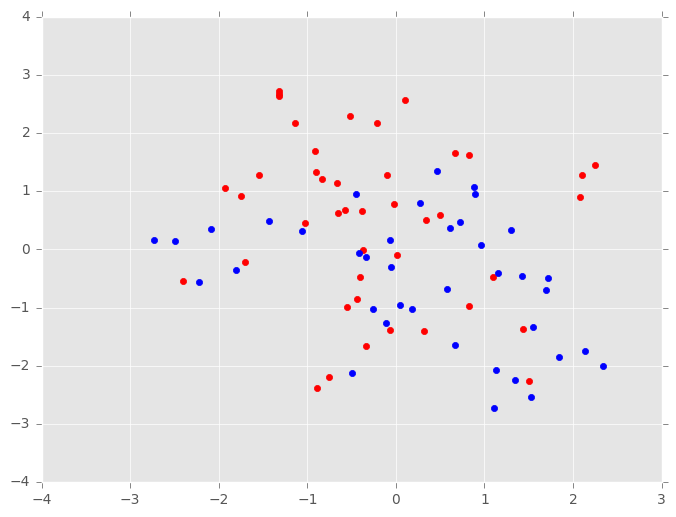

In [63]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
# ax.scatter(*reduced_data_rtsne.T)
# df_embed.plot.scatter(x='x', y='y', ax=ax, c=df_embed.color.values)

for i in ['Positive', 'Negative']:
    col = 'blue' if i == 'Negative' else 'red'
    _df = df_embed.query('HIV_status == "{0}"'.format(i))
    ax.scatter(_df['x'].values, _df['y'].values, color=col)

In [393]:
df_jnt['CD4']

0      4.9655
1     13.2054
2     16.4414
3     10.1120
4     28.0539
5     15.3517
6      8.1018
7     18.1117
8     15.8280
9     21.1948
10     8.1593
11    13.5350
12     7.9053
13    23.2196
14    16.0456
15     5.8347
16    15.7068
17     6.5621
18     6.2292
19     7.8638
20     1.9428
21    29.7691
22    36.9461
23    10.6766
24     7.6632
25     3.4928
26     4.8944
27    12.8546
28    28.6762
29     6.8959
       ...   
52     2.8734
53    17.1700
54     5.6284
55    19.3586
56    18.4659
57    19.8147
58    11.4371
59    21.2499
60    12.5690
61     7.0495
62     5.8118
63    27.1268
64    21.3168
65    15.7287
66     0.6573
67    14.6911
68    14.5548
69    13.2676
70     3.0424
71    20.2035
72    21.5861
73    12.0835
74    42.5732
75     6.5555
76     4.1686
77    18.3819
78    20.3257
79     3.0635
80     3.9297
81     9.7960
Name: CD4, dtype: float64

# summarize KMT2 and KDM5 mutations

In [173]:
columns = ['gene', 'chromosome', 'position', 'ref_base', 'alt_base', 'patient_ID', 'snpeff_details']
genes = ['MLL', 'MLL2', 'MLL3', 'MLL4', 'MLL5', 'SETD1A', 'SETD1B', 'KDM5A', 'KDM5B']

In [174]:
df_snvs = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/HIGH_MODERATE_SNV_summary_with_normal_with_AF_filtered.tsv', skiprows=312, sep='\t')
df_snvs.head(2)
# filer rows with a list
snv_tmp = df_snvs[df_snvs['gene'].isin(genes)]
snv_tmp = snv_tmp[columns]
snv_tmp.head(2)

,gene,chromosome,position,ref_base,alt_base,patient_ID,snpeff_details
4061,MLL2,12,49445116,C,G,HTMCP-03-06-02209_Malignant,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gag/Ca...
4062,MLL2,12,49420880,C,T,HTMCP-03-06-02214_Malignant,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gaa/Aa...


In [146]:
snv_tmp.shape

(95, 7)

In [147]:
df_indels = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/101_patients/HIGH_MODERATE_INDEL_summary_with_normal_strelka_only.tsv', sep='\t')
indel_tmp = df_indels[df_indels['gene'].isin(genes)]
indel_tmp = indel_tmp[columns]
indel_tmp.head(2)

,gene,chromosome,position,ref_base,alt_base,patient_ID,snpeff_details
82,MLL3,7,151879476,CTG,C,HTMCP-03-06-02097_Malignant,FRAME_SHIFT(HIGH||-|-1823|4911|MLL3|protein_co...
83,MLL3,7,151927034,AACACTGACC,A,HTMCP-03-06-02001_Malignant,CODON_DELETION(MODERATE||ggtcagtgt/-|GQC981-|4...


In [148]:
indel_tmp.shape

(7, 7)

In [149]:
# concat 2 dataframes
df_cnct = pd.concat([snv_tmp, indel_tmp])
df_cnct.shape

(102, 7)

In [150]:
df_cnct['mut_type'] = df_cnct.snpeff_details.apply(lambda x: x.split('(')[0])
df_cnct['patient'] = df_cnct.patient_ID.apply(lambda y: y.split('_')[0])
df_cnct.drop(['patient_ID', 'snpeff_details'], axis=1,inplace=True)
# df_cnct.set_index('patient', inplace=True)
df_cnct.head(2)

,gene,chromosome,position,ref_base,alt_base,mut_type,patient
4061,MLL2,12,49445116,C,G,NON_SYNONYMOUS_CODING,HTMCP-03-06-02209
4062,MLL2,12,49420880,C,T,NON_SYNONYMOUS_CODING,HTMCP-03-06-02214


In [172]:
# combine mutation for each patient into one row
def process_grp(grp):
    _df_or_sr = grp.apply(lambda col: ';'.join(col.unique().tolist()))
    _df = _df_or_sr.to_frame().T
    assert _df.shape[0] == 1
    return _df

In [171]:
# for name , grp in df_cnct.groupby(['patient', 'gene']):
#     print(name)
#     print(grp.apply(lambda col: ';'.join(col.apply(str).unique().tolist())))
df_cnct.apply(process_grp).reset_index(level=2, drop=True)


AttributeError: ("'str' object has no attribute 'unique'", u'occurred at index gene')

In [142]:
df_pivot = df_cnct.pivot(index='patient', columns='gene', values='mut_type')
df_pivot


KeyError: 'patient'

# Below get all genes related to immunodeficiency from a database using read_html

In [25]:
# look for immunodeficiency genes
import html5lib
import lxml
import bs4
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

df_id = pd.read_html('http://structure.bmc.lu.se/idbase/IDRefSeq/xml/idr/genes.html')

# read_html return a list of dataframe, in this case only one dataframe
df = df_id[0]
df = df.dropna()[df[0] != 'Disease'][[0,2,3]]
df.head()

# add column header to a dataframe
df.columns = ['disease', 'gene', 'band']

df.shape
df.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/immunodeficiency_genes.txt', sep='\t', index=False)

In [177]:
gene_cols = df_expr.drop('lib', axis=1).columns.values

In [51]:
# np.save('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.genes.npy', gene_cols)

In [178]:
df_stat = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/hiv_status.txt', sep='\t',header= None, names=['lib','hiv'])

In [179]:
df_stat.shape

(82, 2)

In [180]:
df_stat.head(2)

,lib,hiv
0,A37700,Positive
1,A37701,Negative


In [181]:
df_hist = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/patient_histology_miRNA_prediction.csv', sep='\t')

In [182]:
df_hist.shape

(82, 23)

In [183]:
df_hist.head(2)

,mRNA_library,patient,putative_Histology,clinical_histolgy,Purity,num_mutated_genes,num_HPV_strains,PIK3CA,HLA-B,HLA-A,...,NFE2L2,ARID1A,CASP8,ERBB3,KRAS,PTEN,TGFBR2,MAPK1,MED1,HIV_status
0,A37700,HTMCP-03-06-02001,Squamous,NaN,60.00,247,1,Yes,No,No,...,No,No,No,No,No,No,No,No,No,Positive
1,A37701,HTMCP-03-06-02002,Squamous,NaN,71.25,180,1,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Negative


In [184]:
df_hist.rename(columns={'mRNA_library': 'lib', 'HIV_status': 'hiv'}, inplace=True)

In [185]:
_mut_genes = ['PIK3CA', 'HLA-B', 'HLA-A', 'FBXW7', 'EP300', 'ERBB2', 'NFE2L2', 'ARID1A', 'CASP8', 'ERBB3', 'KRAS', 'PTEN', 'TGFBR2', 'MAPK1', 'MED1']
mut_genes = ['{0}_mut'.format(_) for _ in _mut_genes]

In [52]:
# np.save('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.mut_genes.npy', np.array(mut_genes))

In [186]:
df_hist.rename(columns=dict(zip(_mut_genes, mut_genes)), inplace=True)

In [187]:
df_hist[mut_genes] = df_hist[mut_genes].replace({'Yes': 1, 'No': 0})

In [188]:
merged = pd.merge(df_expr, df_stat, on='lib')

In [189]:
merged = merged.merge(df_hist, on=['lib', 'hiv'])

In [190]:
merged.shape

(82, 42607)

In [44]:
# merged.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.dedup.merged.txt', index=False)